# Round 5

In [6]:
# !pip install -U prosperity3bt
!prosperity3bt "Options Fixed.py" 3-0 3-1 5 --match-trades worse --merge-pnl --vis

Backtesting G:\.shortcut-targets-by-id\1kCoYjL0gKyLojwoocZDIngh_T8m7DBqw\IMC Prosperity Event\Michael Work\Options Fixed.py on round 3 day 0
CROISSANTS: 0
DJEMBES: 0
JAMS: 0
KELP: 0
PICNIC_BASKET1: 0
PICNIC_BASKET2: 0
RAINFOREST_RESIN: 0
SQUID_INK: 0
VOLCANIC_ROCK: -63,633
VOLCANIC_ROCK_VOUCHER_10000: 44,299
VOLCANIC_ROCK_VOUCHER_10250: 35,904
VOLCANIC_ROCK_VOUCHER_10500: 6,169
VOLCANIC_ROCK_VOUCHER_9500: 9,552
VOLCANIC_ROCK_VOUCHER_9750: 45,514
Total profit: 77,806

Backtesting G:\.shortcut-targets-by-id\1kCoYjL0gKyLojwoocZDIngh_T8m7DBqw\IMC Prosperity Event\Michael Work\Options Fixed.py on round 3 day 1
CROISSANTS: 0
DJEMBES: 0
JAMS: 0
KELP: 0
PICNIC_BASKET1: 0
PICNIC_BASKET2: 0
RAINFOREST_RESIN: 0
SQUID_INK: 0
VOLCANIC_ROCK: -126,819
VOLCANIC_ROCK_VOUCHER_10000: 68,321
VOLCANIC_ROCK_VOUCHER_10250: 9,210
VOLCANIC_ROCK_VOUCHER_10500: -14,042
VOLCANIC_ROCK_VOUCHER_9500: 102,688
VOLCANIC_ROCK_VOUCHER_9750: 79,657
Total profit: 119,014

Backtesting G:\.shortcut-targets-by-id\1kCoYjL0gKyL


100%|##########| 10000/10000 [00:04<00:00, 2391.57it/s]

100%|##########| 10000/10000 [00:04<00:00, 2202.74it/s]

100%|##########| 10000/10000 [00:04<00:00, 2270.38it/s]

100%|##########| 10000/10000 [00:04<00:00, 2112.07it/s]

100%|##########| 10000/10000 [00:04<00:00, 2219.92it/s]

100%|##########| 10000/10000 [00:04<00:00, 2212.47it/s]


54.85905218876869
[1.69473601] -716.7409375462321


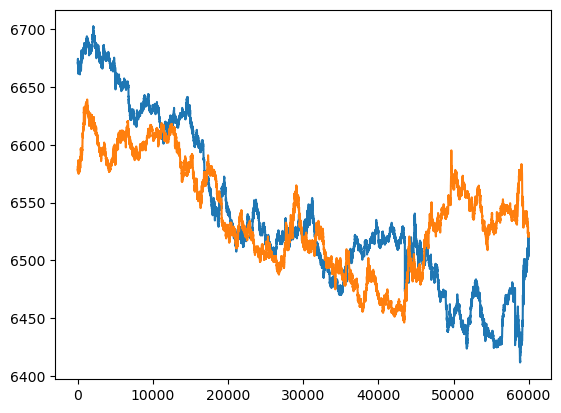

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

prices_df = pd.concat([
    pd.read_csv("options/-1.csv", sep=";"),
    pd.read_csv("options/0.csv", sep=";"),
    pd.read_csv("options/1.csv", sep=";"),
    pd.read_csv("options/2.csv", sep=";"),
    pd.read_csv("options/3.csv", sep=";"),
    pd.read_csv("options/4.csv", sep=";")
])

croissants_df = prices_df[prices_df["product"]=="CROISSANTS"]["mid_price"].to_numpy()
jams_df = prices_df[prices_df["product"]=="JAMS"]["mid_price"].to_numpy()

reg = LinearRegression().fit(croissants_df.reshape(-1,1), jams_df)
reg.score(croissants_df.reshape(-1,1), jams_df)

y_pred = reg.predict(croissants_df.reshape(-1,1))
residuals = jams_df - y_pred
print(np.std(residuals))

plt.plot(range(60000), jams_df)
plt.plot(range(60000), y_pred)

# res = sm.tsa.stattools.coint(y_pred, jams_df)
# a,b,c = res

print(reg.coef_, reg.intercept_)

# print(a,b,c)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

trades_df = pd.concat([pd.read_csv("../resources/round5/trades_round_5_day_2.csv", sep=";"),
                       pd.read_csv("../resources/round5/trades_round_5_day_3.csv", sep=";"),
                       pd.read_csv("../resources/round5/trades_round_5_day_4.csv", sep=";")])

info1 = trades_df[trades_df["symbol"].str.contains("VOLCANIC_ROCK")].groupby(["seller", "symbol",]).sum().drop(["timestamp", "buyer", "currency", "price"], axis=1)
info2 = trades_df[trades_df["symbol"].str.contains("VOLCANIC_ROCK")].groupby(["buyer", "symbol",]).sum().drop(["timestamp", "seller", "currency", "price"], axis=1)
print(info1)
print(info2)

                                      quantity
seller   symbol                               
Caesar   VOLCANIC_ROCK                   10579
         VOLCANIC_ROCK_VOUCHER_10000     21786
         VOLCANIC_ROCK_VOUCHER_10250     20204
         VOLCANIC_ROCK_VOUCHER_10500     12493
         VOLCANIC_ROCK_VOUCHER_9500      20960
         VOLCANIC_ROCK_VOUCHER_9750      21627
Camilla  VOLCANIC_ROCK_VOUCHER_10000      3380
         VOLCANIC_ROCK_VOUCHER_10250      1155
         VOLCANIC_ROCK_VOUCHER_10500       140
         VOLCANIC_ROCK_VOUCHER_9500       4761
         VOLCANIC_ROCK_VOUCHER_9750       4808
Pablo    VOLCANIC_ROCK                     388
         VOLCANIC_ROCK_VOUCHER_10000      3792
         VOLCANIC_ROCK_VOUCHER_10250      3798
         VOLCANIC_ROCK_VOUCHER_10500      3861
         VOLCANIC_ROCK_VOUCHER_9500       3803
         VOLCANIC_ROCK_VOUCHER_9750       3785
Penelope VOLCANIC_ROCK_VOUCHER_10000      3920
         VOLCANIC_ROCK_VOUCHER_10250      1412
         VOLC

[10503.  10510.  10513.  ... 10106.5 10105.  10105. ]
-7.726270482421137e-07 0.00024269185238401855
0.9098719026806066 1.1184654954118654 0.9771898939085488


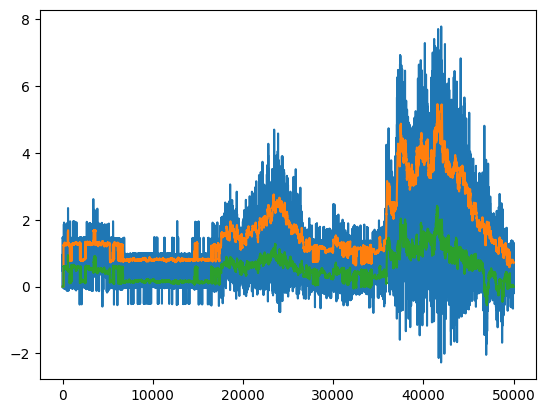

In [101]:
import numpy as np
import pandas as pd
from statistics import NormalDist
import matplotlib.pyplot as plt

price_df = pd.concat([pd.read_csv("options/0.csv", sep=";"), 
                      pd.read_csv("options/1.csv", sep=";"),
                      pd.read_csv("options/2.csv", sep=";"),
                      pd.read_csv("options/3.csv", sep=";"),
                      pd.read_csv("options/4.csv", sep=";")], ignore_index=True)

options = np.array(price_df[price_df["product"] == "VOLCANIC_ROCK"]["mid_price"])
print(options)
log_returns = np.log(options[1:]/options[:-1])

print(np.mean(log_returns), np.std(log_returns))

def black_scholes_hist(S, K, timestamp):
    T = 8 - (timestamp / 10000)  # Convert days to years
    sigma = np.std(log_returns)* 32.95
    d1 = (np.log(S / K) + (0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * NormalDist().cdf(d1) - K * NormalDist().cdf(d2)
    # print(norm.cdf(d2))
    return call_price

k105 = np.array(price_df[price_df["product"] == "VOLCANIC_ROCK_VOUCHER_9750"]["mid_price"])
# plt.plot(range(50000), k105)
implied_price = np.array([black_scholes_hist(options[x], 9750, x) for x in range(50000)])
# plt.plot(range(50000), implied_price)
# cur_min = 72936.93860107535
OLS = (k105 - implied_price)
rolling_med = np.array([0]*100 + [np.median(OLS[x:x+100]) for x in range(49900)])
rolling_std = np.array([0]*100 + [np.std(OLS[x:x+100]) for x in range(49900)])
print(np.median(OLS), np.mean(OLS), np.std(OLS))
# print(np.sum(OLS**2))
plt.plot(range(50000), OLS)
plt.plot(range(50000), rolling_med + rolling_std)
plt.plot(range(50000), rolling_med - rolling_std)

/Users/michaellee32164/.conda/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/regime_switching/markov_switching.py:1292: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/Users/michaellee32164/.conda/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/regime_switching/markov_switching.py:1292: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:             sugarPrice   No. Observations:                20000
Model:               MarkovRegression   Log Likelihood              -66136.642
Date:                Sun, 20 Apr 2025   AIC                         132307.285
Time:                        19:51:21   BIC                         132441.644
Sample:                             0   HQIC                        132351.243
                              - 20000                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.0565      0.171   1155.967      0.000     197.721     198.392
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.0607      0.263    752.085      0.000     197.544     198.577
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.5235      0.092   2155.796      0.000     198.343     198.704
                             Regime 3 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.9089      0.047   4365.655      0.000     203.817     204.000
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        43.6318      0.436    100.000      0.000      42.777      44.487
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     2.607e-20      7.353   3.55e-21      1.000     -14.412      14.412
p[1->0]      2.59e-20     11.401   2.27e-21      1.000     -22.346      22.346
p[2->0]       1.1e-19      6.298   1.75e-20      1.000     -12.345      12.345
p[3->0]     1.165e-20        nan        nan        nan         nan         nan
p[0->1]     2.644e-20      0.348    7.6e-20      1.000      -0.682       0.682
p[1->1]     2.627e-20     11.399    2.3e-21      1.000     -22.341      22.341
p[2->1]     1.113e-19     12.802   8.69e-21      1.000     -25.092      25.092
p[3->1]     1.166e-20        nan        nan        nan         nan         nan
p[0->2]        1.0000      4.608      0.217      0.828      -8.032      10.032
p[1->2]        1.0000      7.144      0.140      0.889     -13.001      15.001
p[2->2]     1.335e-06     10.161   1.31e-07      1.000     -19.915      19.915
p[3->2]     8.946e-21        nan        nan        nan         nan         nan
==

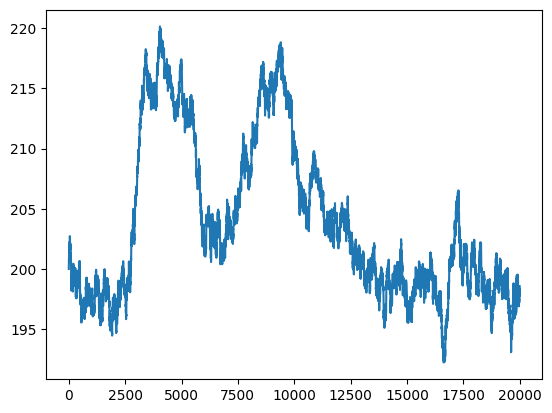

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

price_df = pd.concat([pd.read_csv("../resources/round4/prices_round_4_day_1.csv", sep=";"), pd.read_csv("../resources/round4/prices_round_4_day_2.csv", sep=";")], ignore_index=True)
obs_df = pd.concat([pd.read_csv("../resources/round4/observations_round_4_day_1.csv"), pd.read_csv("../resources/round4/observations_round_4_day_2.csv")], ignore_index=True)

macaron_prices = price_df[price_df["product"] == "MAGNIFICENT_MACARONS"]["mid_price"]
sugar_prices = obs_df["sugarPrice"]
sunlight = obs_df["sunlightIndex"]

cur = 0
linear_prices = list()
slopes = list()

plt.plot(range(20000), sugar_prices)

reg = sm.tsa.MarkovRegression(sugar_prices, k_regimes=4).fit()
reg.summary()

# for x in range(20000):
#     if x%500 == 0:
#         cur = x
#     l, r = sugar_prices.iloc[cur], sugar_prices.iloc[cur+499]
#     slope = (r-l)/500
#     slopes.append(slope)

# slopes = [slopes[x] for x in range(20000) if x%1000==0]


# def grid_search_csi(l, r, n):

#     max_score = 0
#     csi = 0.
    
#     for x in range(n):
#         cur = (r-l)/n * x + l
        
#         sunlight_index = list()

#         for x in range(20):
#             index = x*1000
#             left = sunlight.iloc[index]
#             right = sunlight.iloc[index+999]
#             # print(left, right, x)
#             if left <= cur and right <= cur:
#                 sunlight_index.append(0)
#             elif left >= cur and right >= cur:
#                 sunlight_index.append(1)
#             elif left <= cur and right >= cur:
#                 sunlight_index.append(2)
#             elif left >= cur and right <= cur:
#                 sunlight_index.append(3)
#             else:
#                 print(f"WTF: {left,right,index}")
            
        
#         X = np.array(sunlight_index).reshape(-1,1)
#         # print(f"X = {X}")
#         y = slopes
#         # print(f"y = {y}")
        
#         reg = LinearRegression().fit(X,y)
#         score = reg.score(X,y)

#         if score > max_score:
#             max_score = score
#             csi = cur

#     return csi, max_score

# print(grid_search_csi(40,60,40))

    

    
    

